In [1]:
from sklearn.datasets import load_digits
digits = load_digits()


In [2]:
X = digits.data
y = digits.target

X.shape, y.shape


((1797, 64), (1797,))

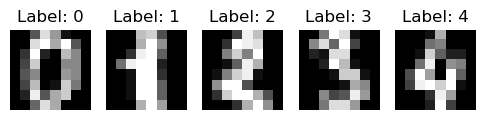

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9694444444444444

In [7]:
k_values = [3, 5, 7, 9]
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

accuracies


[0.9694444444444444, 0.975, 0.9722222222222222, 0.9722222222222222]

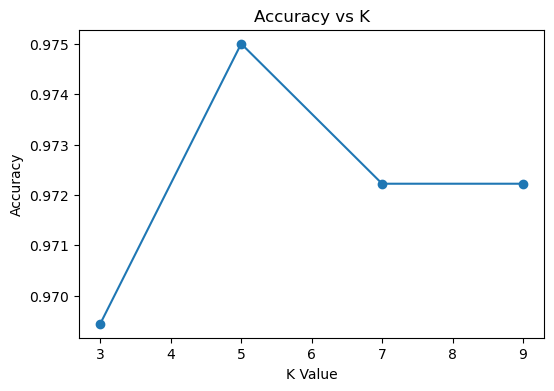

In [8]:
plt.figure(figsize=(6,4))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()


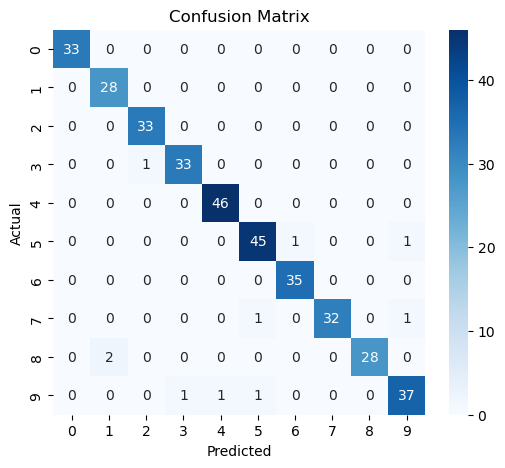

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


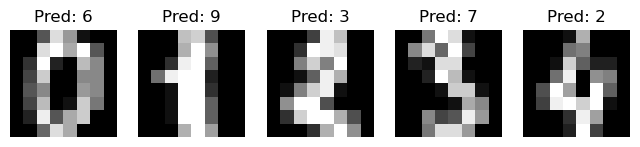

In [10]:
plt.figure(figsize=(8,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Pred: {knn.predict(X_test[i].reshape(1,-1))[0]}")
    plt.axis('off')
plt.show()


In [11]:
""" A KNN classifier was trained to classify handwritten digits.
Feature scaling was applied to ensure fair distance calculation.
Multiple K values were tested, and the optimal K was selected based on accuracy.
The model demonstrated strong performance in digit classification."""


' A KNN classifier was trained to classify handwritten digits.\nFeature scaling was applied to ensure fair distance calculation.\nMultiple K values were tested, and the optimal K was selected based on accuracy.\nThe model demonstrated strong performance in digit classification.'